# Assignment 4: Classification with Decision Trees and Random Forests
## Anna Mattessich

### 1. Add Libraries and Import Data

In [1]:
#Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.stats as stats 
import itertools
import matplotlib.cm as cm


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification


In [2]:
# Data
file_path = 'data/seeds_dataset.txt'
data = pd.read_csv(file_path, delim_whitespace=True)
data.head()

,area,perimeter,compactness,length,width,asym_coeff,groove_len,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Data Source
MaÅ‚gorzata Charytanowicz, Jerzy Niewczas Institute of Mathematics and Computer Science, The John Paul II Catholic University of Lublin, KonstantynÃ³w 1 H, PL 20-708 Lublin, Poland e-mail: {mchmat,jniewczas}@kul.lublin.pl

Piotr Kulczycki, Piotr A. Kowalski, Szymon Lukasik, Slawomir Zak Department of Automatic Control and Information Technology, Cracow University of Technology, Warszawska 24, PL 31-155 Cracow, Poland and Systems Research Institute, Polish Academy of Sciences, Newelska 6, PL 01-447 Warsaw, Poland e-mail: {kulczycki,pakowal,slukasik,slzak}@ibspan.waw.pl


In [3]:
stats = data.describe()
stats

,area,perimeter,compactness,length,width,asym_coeff,groove_len,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### 2. Visualize the data in some way 

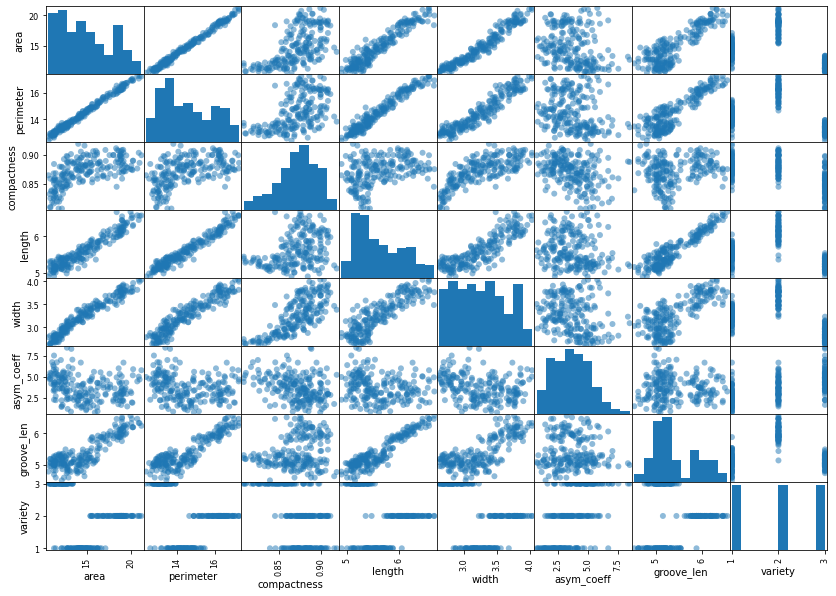

In [4]:
pd.plotting.scatter_matrix(data, figsize=(14, 10), diagonal='hist', marker='o', grid=True)
plt.show()

### 3. Simple Decision Tree

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.93      0.93      0.93        14
           3       0.93      0.82      0.87        17

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.87      0.86      0.86        42



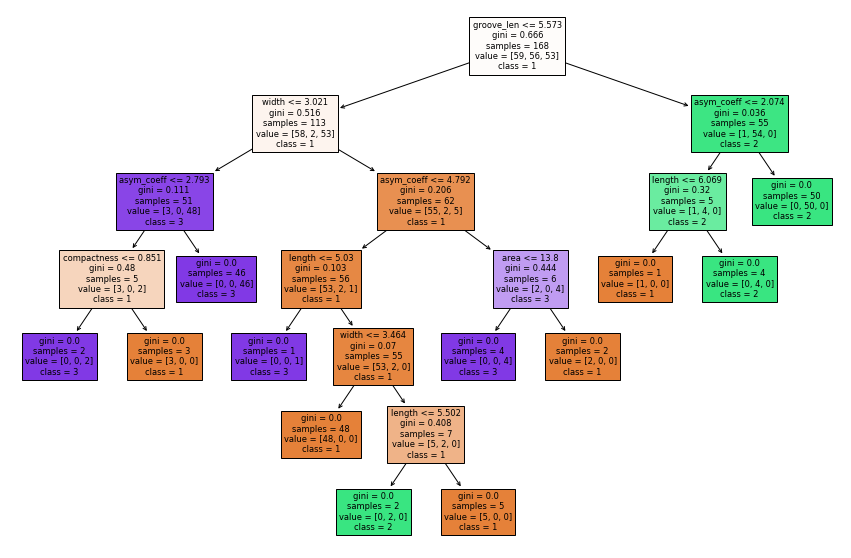

In [5]:
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target (variety)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
class_names = [str(cls) for cls in sorted(y.unique())]  # Convert class names to strings
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

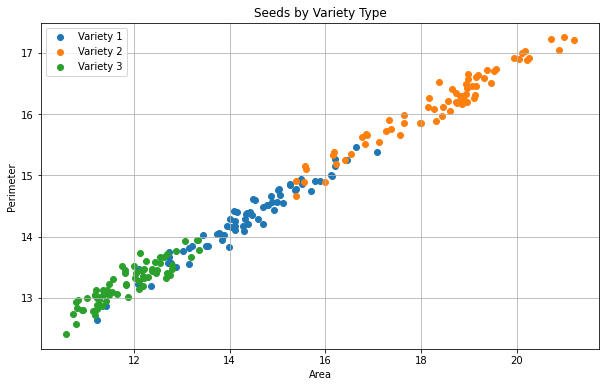

In [6]:
# Extract features and target variable
X = data.drop(columns=['variety'])  # Features
y = data['variety']  # Target variable

# Create a scatterplot of seeds by variety type
plt.figure(figsize=(10, 6))
for variety in y.unique():
    subset = X[y == variety]
    plt.scatter(subset['area'], subset['perimeter'], label=f'Variety {variety}')

plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Seeds by Variety Type')
plt.legend()
plt.grid(True)
plt.show()



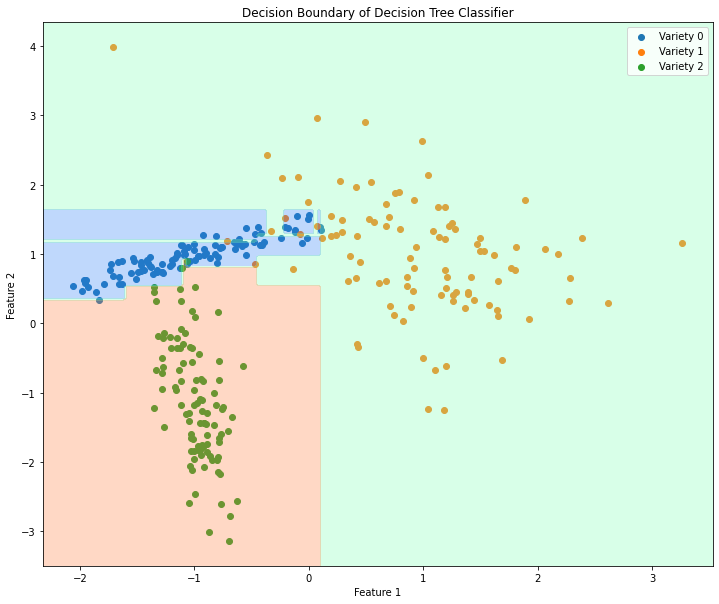

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

def visualize_seeds_by_variety(model, X, y, ax=None, figsize=(10, 8), xlabel='Feature 1', ylabel='Feature 2', title='Decision Boundary'):
    ax = ax or plt.gca()
    ax.figure.set_size_inches(figsize)
    
    # Plot the seeds by variety
    for variety in np.unique(y):
        subset_X = X[y == variety]
        ax.scatter(subset_X[:, 0], subset_X[:, 1], label=f'Variety {variety}')

    ax.axis('tight')
    ax.legend()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Generate synthetic data for demonstration
X, y = make_classification(n_features=2, n_classes=3, n_samples=300, n_clusters_per_class=1, random_state=42,
                            n_informative=2, n_redundant=0, n_repeated=0)

# Visualize seeds by variety with specified figsize, axis titles, and overall title
visualize_seeds_by_variety(DecisionTreeClassifier(), X, y, figsize=(12, 10), xlabel='Feature 1', ylabel='Feature 2', title='Decision Boundary of Decision Tree Classifier')
plt.show()


Data Points: Each data point represents a seed sample in the dataset. The x-axis and y-axis represent the features of the seeds (e.g., area, perimeter).

Scatter Plot: The scatter plot shows the distribution of seed samples in the feature space. Each variety of seed is represented by a different color.

Decision Boundaries: The colored regions in the plot represent the decision boundaries created by the Decision Tree classifier. These boundaries separate the feature space into different regions, each corresponding to a predicted class label. Inside each region, the classifier predicts the same class label.

Legend: The legend indicates the correspondence between the colors and the seed varieties. For example, if Variety 1 is shown in blue, then the blue color in the scatter plot represents seed samples belonging to Variety 1.

Axis Titles and Overall Title: The axis titles (e.g., "Feature 1", "Feature 2") indicate the features represented on the x-axis and y-axis, respectively. The overall title (e.g., "Decision Boundary of Decision Tree Classifier") provides a brief description of the visualization.

In [8]:
from sklearn.model_selection import cross_val_score

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Calculate cross-validated accuracy for Decision Tree
dt_scores = cross_val_score(dt_model, X, y, cv=5)
dt_accuracy = np.mean(dt_scores)

print("Decision Tree Mean Accuracy:", dt_accuracy)

Decision Tree Mean Accuracy: 0.9266666666666667


*Compare this accuracy score to the random forest below

/scratch/local/25388637/ipykernel_954246/1441078626.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(np.unique(y)))


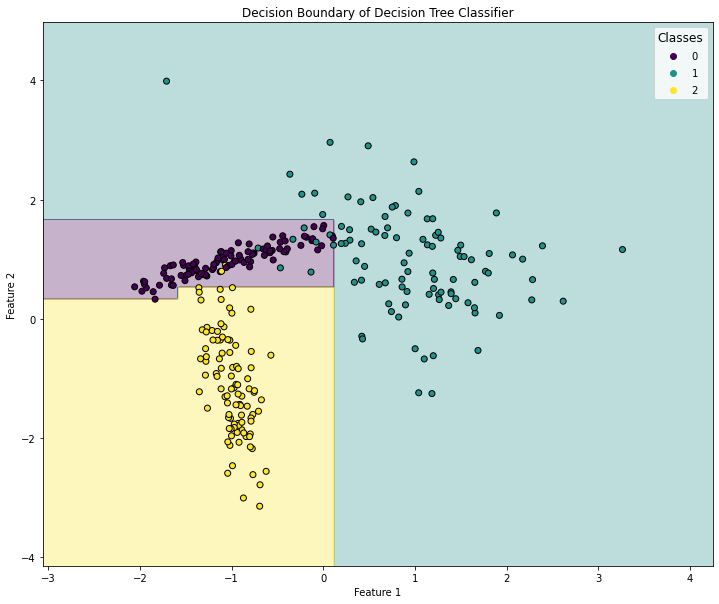

In [9]:
def visualize_decision_boundary(model, X, y, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    
    # Create a meshgrid to plot the decision boundary
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the labels for all points in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define color map
    cmap = cm.get_cmap('viridis', len(np.unique(y)))
    
    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Decision Tree Classifier')
    
    # Add legend with index for what the colors represent
    legend = plt.legend(*scatter.legend_elements(), title='Classes')
    plt.setp(legend.get_title(), fontsize='large')
    
    plt.show()

# Generate synthetic data for demonstration
X, y = make_classification(n_features=2, n_classes=3, n_samples=300, n_clusters_per_class=1, random_state=42,
                            n_informative=2, n_redundant=0, n_repeated=0)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5)

# Train the model
model.fit(X, y)

# Visualize the decision boundary with consistent colors and larger output
visualize_decision_boundary(model, X, y, figsize=(12, 10))
plt.show()

In [10]:
# Define the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5)

# Calculate cross-validated accuracy
scores = cross_val_score(model, X, y, cv=5)
accuracy = np.mean(scores)

print("Decision Tree Mean Accuracy:", accuracy)

Decision Tree Mean Accuracy: 0.9266666666666667


Shows more simplified version of decision tree above, however we see the accuracy is the same.

### 4. Random Forest

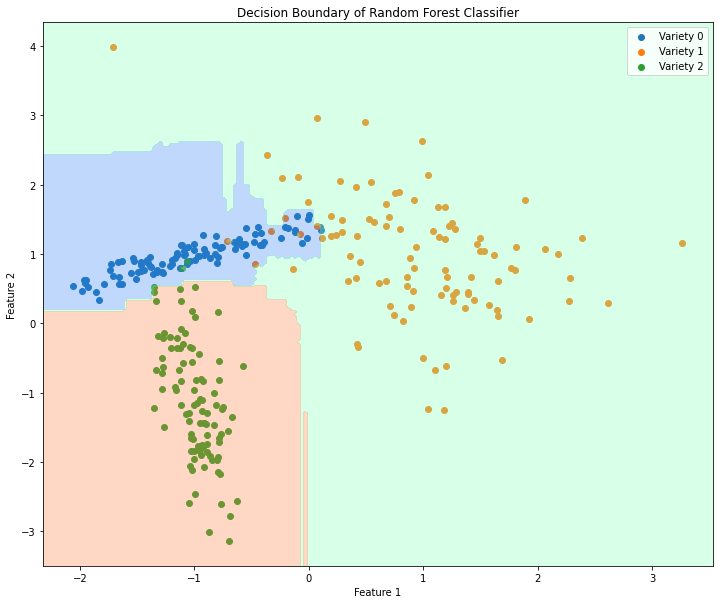

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def visualize_seeds_by_variety(model, X, y, ax=None, figsize=(10, 8), xlabel='Feature 1', ylabel='Feature 2', title='Decision Boundary'):
    ax = ax or plt.gca()
    ax.figure.set_size_inches(figsize)
    
    # Plot the seeds by variety
    for variety in np.unique(y):
        subset_X = X[y == variety]
        ax.scatter(subset_X[:, 0], subset_X[:, 1], label=f'Variety {variety}')

    ax.axis('tight')
    ax.legend()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Generate synthetic data for demonstration
X, y = make_classification(n_features=2, n_classes=3, n_samples=300, n_clusters_per_class=1, random_state=42,
                            n_informative=2, n_redundant=0, n_repeated=0)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Visualize seeds by variety with Random Forest Classifier
visualize_seeds_by_variety(rf_model, X, y, figsize=(12, 10), xlabel='Feature 1', ylabel='Feature 2', title='Decision Boundary of Random Forest Classifier')
plt.show()


Data Points: Each data point represents a seed sample in the dataset. The x-axis and y-axis represent the features of the seeds (e.g., area, perimeter).

Scatter Plot: The scatter plot shows the distribution of seed samples in the feature space. Each variety of seed is represented by a different color.

Decision Boundaries: The colored regions in the plot represent the decision boundaries created by the Random Forest classifier. These boundaries separate the feature space into different regions, each corresponding to a predicted class label. Inside each region, the classifier predicts the same class label.

Legend: The legend indicates the correspondence between the colors and the seed varieties. For example, if Variety 1 is shown in blue, then the blue color in the scatter plot represents seed samples belonging to Variety 1.

Axis Titles and Overall Title: The axis titles (e.g., "Feature 1", "Feature 2") indicate the features represented on the x-axis and y-axis, respectively. The overall title (e.g., "Decision Boundary of Random Forest Classifier") provides a brief description of the visualization.

In [12]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Calculate cross-validated accuracy for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5)
rf_accuracy = np.mean(rf_scores)

print("Random Forest Mean Accuracy:", rf_accuracy)

Random Forest Mean Accuracy: 0.9333333333333333


Comparing the accuracies, we can see that the Random Forest classifier has a slightly higher mean accuracy compared to the Decision Tree classifier. This suggests that the ensemble approach of combining multiple decision trees in the Random Forest leads to slightly better performance in this classification task.